# Optimisez la gestion des données d'une boutique avec R ou Python

<a href="https://user.oc-static.com/upload/2020/11/23/16061348800222_Capture%20d%E2%80%99e%CC%81cran%202020-11-23%20a%CC%80%2013.33.23.png" class="oc-imageLink oc-imageLink--disabled"><img src="https://user.oc-static.com/upload/2020/11/23/16061348800222_Capture%20d%E2%80%99e%CC%81cran%202020-11-23%20a%CC%80%2013.33.23.png" alt="Logo de Bottleneck"></a>

# **OBJECTIFS:**
    
1. Rapprochement de deux exports :

 - Un **export de l’ERP** contenant les références produit, leur prix de vente et leur état de stock 
 - Un **export d’une table de l’outil de CMS** contenant les informations des produits commercialisés en ligne (nom, description, nombre de ventes...)
 
- L’export issu de la boutique en ligne contient le nombre de ventes pour chaque produit depuis sa mise en ligne, il ne permet pas d’analyser l'évolution des ventes dans le temps.

- Un tableau Excel a été créé afin d’établir le lien entre la référence du produit dans l’ERP (product_id) et la référence du même produit dans la base de la boutique en ligne (SKU).

2. Après le rapprochement effectué, il faut obtenir :
 -  **Le chiffre d’affaires par produit**
 -  **Le total du chiffre d’affaires réalisé en ligne**.
 
3. Il y a des erreurs de saisie dans certains prix des produits. Il faudrait effectuer une analyse sur cette variable afin de détecter d’éventuelles valeurs aberrantes, de les lister et d’en faire une représentation graphique pour plus de lisibilité.

4. Une colonne a été mal nommée dans le fichier Excel. En fait, la colonne id_web dans le fichier correspond au SKU des produits dans la boutique en ligne.

**SOMMAIRE:**

<a href="#C1">**Partie 1 : Préparation des données**</a>

  - <a href="#C2">1.Importer les librairies</a>
  - <a href="#C3">2.Importer le jeu des données</a>
  - <a href="#C4">3.Vérification de chaque dataframe lors de l'importation et pré-traitement des données</a>
  - <a href="#C5">4.Pré_traitement et nettoyage des données</a>
 
<a href="#C6">**Partie 2 : Analyse des données**</a>

<a href="#C7">1. **Rapprochement des exports**</a>
   
  - <a href="#C8">Renommage de la colonne id_web</a>
  - <a href="#C9">Jointure entre les 3 tables</a>
 
<a href="#C10">2. **Chiffres d'affaires et outliers**</a>
  
  - <a href="#C11">Calcul du chiffre d'affaire par produit et le CA total</a>
 
<a href="#C12">3.**Outliers**</a>

  - <a href="#C13">Détection des outliers par la méthode du IQR</a>
  - <a href="#C14">Détection des outliers par la méthode du Z-score</a>
  - <a href="#C15">Visualisation graphique des outliers</a>
    

# <a name="C1"><font>Partie 1 : Préparation des données</font></a>

### <a name="C2"><font>Importer les librairies</font></a>

In [338]:
#Pandas est une librairie user friendly qui gère un très grand nombre de données, a beaucoup de fonctionnalités.
#L'avantage est qu'elle soit complementaire avec d'autres librairies. 
#2 structures de données de Pandas : Dataframe(matrice/tableau) / Series
import pandas as pd

# Numpy est une librairie destineé à manipuler les matrices et les tableaux multidimentionnels.
import numpy as np

#visualisation graphique des données:Seaborn et matplotlib se sont deux librairies destinées à créer une visualisation de données.
import matplotlib.pyplot as plt
import seaborn as sns

In [339]:
#Importer les librairies Pandas et Numpy
import pandas as pd
pd.options.mode.chained_assignment =None

# Verifier la version de pandas
print("Pandas verion : " + pd.__version__)

import numpy as np
print("NumPy version : " + np.__version__)

import matplotlib.pyplot as plt

import seaborn as sns
print("seaborn version : " + sns.__version__)

Pandas verion : 1.4.4
NumPy version : 1.21.5
seaborn version : 0.11.2


### <a name="C3"><font>Importer le jeu des données</font></a>

In [340]:
#Importer le fichiers excel des données erp
df_erp=pd.read_excel('erp.xlsx')
df_web=pd.read_excel('web.xlsx')
df_liaison=pd.read_excel('liaison.xlsx')

C:\Users\MAHJOUB Samira\anaconda3\lib\site-packages\openpyxl\worksheet\_read_only.py:79: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():
C:\Users\MAHJOUB Samira\anaconda3\lib\site-packages\openpyxl\worksheet\_read_only.py:79: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():
C:\Users\MAHJOUB Samira\anaconda3\lib\site-packages\openpyxl\worksheet\_read_only.py:79: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():


### <a name="C4"><font>Vérification de chaque dataframe lors de l'importation et pré-traitement des données</font></a>

In [341]:
### Les fonctions pour les verifier les données:
#dataframe.describe() 
#dataframe.info()

In [342]:
#Vérifier les différentes informaTions et voir quels variables contiennent des valeurs manquantes
df_erp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   product_id      825 non-null    int64  
 1   onsale_web      825 non-null    int64  
 2   price           825 non-null    float64
 3   stock_quantity  825 non-null    int64  
 4   stock_status    825 non-null    object 
dtypes: float64(1), int64(3), object(1)
memory usage: 32.4+ KB


In [343]:
#Vérifier les différentes informaTions et voir quels variables contiennent des valeurs manquantes
df_web.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1513 entries, 0 to 1512
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   sku                    1428 non-null   object        
 1   virtual                1513 non-null   int64         
 2   downloadable           1513 non-null   int64         
 3   rating_count           1513 non-null   int64         
 4   average_rating         1430 non-null   float64       
 5   total_sales            1430 non-null   float64       
 6   tax_status             716 non-null    object        
 7   tax_class              0 non-null      float64       
 8   post_author            1430 non-null   float64       
 9   post_date              1430 non-null   datetime64[ns]
 10  post_date_gmt          1430 non-null   datetime64[ns]
 11  post_content           0 non-null      float64       
 12  post_title             1430 non-null   object        
 13  pos

In [344]:
#Vérifier les différentes informaTions et voir quels variables contiennent des valeurs manquantes
df_liaison.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   product_id  825 non-null    int64 
 1   id_web      734 non-null    object
dtypes: int64(1), object(1)
memory usage: 13.0+ KB


### <a name="C5"><font>Pré_traitement et nettoyage des données</font></a>

Nos jeux de données contiennent :

- (1) erp:la référence des produits,leurs prix de vente ainsi que leurs états de stock
- (2) web:Les informations des produits commercialisés en ligne(nom,description,nombre de ventes...)
- (3) liaison:la réference des produits de l’ERP avec leurs références côté Web

### Analyse des valeurs manquantes:
* ligne,colonne=df.shape
* nb_cell=ligne*colonne
* nb_null=df.isnull().sum().sum()
* Pourcentage valeurs manquantes=nb_null *100/nb_cell
    
### Table erp :
* Nombre de valeurs manquantes = 0
* Nombre de cellulles totales = 4125
* Pourcentage de valeurs manquantes =  0.0 %

### Table web :
* Nombre de valeurs manquantes = 9941
* Nombre de cellulles totales = 42364
* Pourcentage de valeurs manquantes =  23.47 %

### Table liaison :
* Nombre de valeurs manquantes = 91
* Nombre de cellulles totales = 1650
* Pourcentage de valeurs manquantes =  5.52 %

### Nettoyage du tableau erp

In [345]:
#Détecter les valeurs manquantes en détail

print('Le nombre de valuers manquantes=',df_erp.isnull().sum().sum())

Le nombre de valuers manquantes= 0


In [346]:
#Analyse des types de données de la table erp

print(df_erp.dtypes)
print('\n')
#Je compte le nombre de variables par type
df_erp.dtypes.value_counts()

product_id          int64
onsale_web          int64
price             float64
stock_quantity      int64
stock_status       object
dtype: object




int64      3
float64    1
object     1
dtype: int64

In [347]:
#Vérifier l'unicité de la clé primaire
#Creation d'une fonction qui teste l'unicité d'une colonne  

def cle_primaire(df,col):
    if len(df)==len(df[col].unique()):
        print('La variable', col, 'est une clé primaire')
    else: 
        print('La variable',col, 'n\'est pas une clé primaire')

In [348]:
cle_primaire(df_erp,'product_id')

La variable product_id est une clé primaire


In [349]:
#Affichage du nombre de lignes et colonnes des jeux de données
print('erp',df_erp.shape)

erp (825, 5)


In [350]:
#Je détecte les valeurs en doubles
df_erp.duplicated().sum()

0

In [351]:
# je supprime les doublons
df_erp.loc[~((df_erp['product_id'].duplicated())|(df_erp['product_id'].isnull())),:] 

,product_id,onsale_web,price,stock_quantity,stock_status
0,3847,1,24.2,0,outofstock
1,3849,1,34.3,0,outofstock
2,3850,1,20.8,0,outofstock
3,4032,1,14.1,0,outofstock
4,4039,1,46.0,0,outofstock
...,...,...,...,...,...
820,7203,0,45.0,30,instock
821,7204,0,45.0,9,instock
822,7247,1,54.8,23,instock
823,7329,0,26.5,14,instock


### Nettoyage du tableau web

In [352]:
#Détecter les valeurs manquantes
print('Le nombre de valeurs manquantes=',df_web.isnull().sum().sum())   

Le nombre de valeurs manquantes= 9941


In [353]:
#Analyse des types de données de la table web
print(df_web.dtypes)
print('\n')
#Je compte le nombre de variables par types
df_web.dtypes.value_counts()

sku                              object
virtual                           int64
downloadable                      int64
rating_count                      int64
average_rating                  float64
total_sales                     float64
tax_status                       object
tax_class                       float64
post_author                     float64
post_date                datetime64[ns]
post_date_gmt            datetime64[ns]
post_content                    float64
post_title                       object
post_excerpt                     object
post_status                      object
comment_status                   object
ping_status                      object
post_password                   float64
post_name                        object
post_modified            datetime64[ns]
post_modified_gmt        datetime64[ns]
post_content_filtered           float64
post_parent                     float64
guid                             object
menu_order                      float64


object            11
float64           10
datetime64[ns]     4
int64              3
dtype: int64

In [354]:
#Vérifier l'unicité de la clé primaire
#Je crée une fonction qui teste l'unicité d'une colonne
def cle_primaire(df,col):
    if len(df)==len(df[col].unique()):
        print('La variable',col,'est une clé primaire')
    else:
        print('La variable',col,'n est pas une clé primaire')

In [355]:
cle_primaire(df_web,'sku')

La variable sku n est pas une clé primaire


In [356]:
#Affichage du nombre de lignes et colonnes des jeux de données
print('web',df_web.shape)

web (1513, 28)


In [357]:
#J'affiche les premiers élements du dataframe
df_web.head()

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,bon-cadeau-25-euros,0,0,0,0.0,10.0,taxable,NaN,1.0,2018-06-01 13:53:46,...,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1,15298,0,0,0,0.0,6.0,taxable,NaN,2.0,2018-02-08 12:58:52,...,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
2,15296,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 13:49:41,...,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
3,15300,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 14:08:36,...,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
4,19814,0,0,0,0.0,3.0,taxable,NaN,2.0,2018-02-09 14:01:05,...,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0


In [358]:
df_web[df_web.sku==15298].T

,1,799
sku,15298,15298
virtual,0,0
downloadable,0,0
rating_count,0,0
average_rating,0.0,0.0
total_sales,6.0,6.0
tax_status,taxable,NaN
tax_class,NaN,NaN
post_author,2.0,2.0
post_date,2018-02-08 12:58:52,2018-02-08 12:58:52


In [359]:
#Je détecte les valeurs en doubles
df=df_web['sku'].duplicated().sum()
print('Le nombre de valeur en double est=',df)

Le nombre de valeur en double est= 798


In [360]:
#J'affiche le df dont le sku est null i.e qui n'ont pas de reference produit
df_websku=df_web[df_web['sku'].isnull()]
df_websku

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
178,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
179,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
227,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
230,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
231,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
792,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
793,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
794,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
795,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Il y a 85 lignes sans sku.

In [361]:
#affiche le df des produits qui ont un nom mais qui n'ont pas de reference produit (sku)
df_webskunotnull = df_websku[df_websku['post_type'].notnull()]
df_webskunotnull

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
470,NaN,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-07-31 12:07:23,...,pierre-jean-villa-cote-rotie-fongeant-2017,2019-11-02 13:24:15,2019-11-02 12:24:15,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
471,NaN,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-08-08 11:23:43,...,pierre-jean-villa-condrieu-suspendu-2018,2019-11-02 13:24:01,2019-11-02 12:24:01,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0


#### Deux produits qui n'ont pas de sku.

#### Suppression des doublons

In [362]:
#Création d'une fonction qui supprime les doublons
def supp_lignes(df):
    df=df.drop_duplicates(keep=False)
    print(df.shape)

In [363]:
print('Table erp')
supp_lignes(df_erp)
print('Table liaison')
supp_lignes(df_liaison)
print('Table web')
supp_lignes(df_web)

Table erp
(825, 5)
Table liaison
(825, 2)
Table web
(1430, 28)


In [364]:
#Création du nouveau dataframe web contenant les lignes avec la valeur 'product'
df_webtype=df_web[(df_web['post_type']=='product')&df_web['sku'].notnull()]
df_webtype

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,bon-cadeau-25-euros,0,0,0,0.0,10.0,taxable,NaN,1.0,2018-06-01 13:53:46,...,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1,15298,0,0,0,0.0,6.0,taxable,NaN,2.0,2018-02-08 12:58:52,...,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
2,15296,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 13:49:41,...,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
3,15300,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 14:08:36,...,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
4,19814,0,0,0,0.0,3.0,taxable,NaN,2.0,2018-02-09 14:01:05,...,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
762,16135,0,0,0,0.0,5.0,taxable,NaN,2.0,2020-04-25 13:22:38,...,mouthes-le-bihan-aime-chai-2015,2020-08-26 17:35:03,2020-08-26 15:35:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
767,15891,0,0,0,0.0,0.0,taxable,NaN,2.0,2020-05-02 14:53:40,...,camin-larredya-jurancon-sec-la-virada-2018,2020-08-26 17:35:02,2020-08-26 15:35:02,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
768,15887,0,0,0,0.0,0.0,taxable,NaN,2.0,2020-05-02 15:00:54,...,jamet-cote-rotie-fructus-voluptas-2018,2020-08-14 18:15:03,2020-08-14 16:15:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
797,13127-1,0,0,0,0.0,0.0,taxable,NaN,2.0,2020-06-09 15:42:04,...,clos-du-mont-olivet-chateauneuf-du-pape-2007-2,2020-07-20 17:09:06,2020-07-20 15:09:06,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0


#### Suppression des colonnes vides

In [365]:
#J'affiche la liste des colonnes vides du df web
#les 2 autres df erp et liaison n'ont pas de colonnes vides
print('Liste des colonnes vides:')
[col for col in df_web.columns if df_web[col].isnull().all()]

Liste des colonnes vides:


['tax_class', 'post_content', 'post_password', 'post_content_filtered']

In [366]:
#fonction qui compte, supprime les colonnes vides 
def colonnes_vides(df): 
    l=[col for col in df_web.columns if df_web[col].isnull().all()]
    print('Nombre de colonnes vides =',len(l))
    for colonnes_vides in l:
        df_web.pop(colonnes_vides)
    print(df_web.shape)

In [367]:
#utilisation de la fonction qui compte et supprime les colonnes vides
colonnes_vides(df_web)

Nombre de colonnes vides = 4
(1513, 24)


### Nettoyage du tableau liaison

In [368]:
#Vérifier l'unicité de la clé primaire
cle_primaire(df_liaison,'product_id')

La variable product_id est une clé primaire


In [369]:
#Vérifier l'unicité de la clé primaire
cle_primaire(df_liaison.dropna(),'id_web')

La variable id_web est une clé primaire


In [370]:
#Détecter les valeurs manquantes en détail

print('Le nombre de valuers manquantes=',df_liaison.isnull().sum())

Le nombre de valuers manquantes= product_id     0
id_web        91
dtype: int64


In [371]:
#type des variables de la table web
print(df_liaison.dtypes)
print('\n')
#compte le nombre de variables par type
df_liaison.dtypes.value_counts()

product_id     int64
id_web        object
dtype: object




int64     1
object    1
dtype: int64

In [372]:
#Affichage du nombre de lignes et colonnes des jeux de données
print('liaison',df_liaison.shape)

liaison (825, 2)


In [373]:
#Je détecte les valeurs en doubles
df_liaison.duplicated().sum()

0

# <a name="C6"><font>Partie 2 : Analyse des données</font></a>

## <a name="C7"><font>Rapprochement des exports</font></a>

### <a name="C8"><font>Renommage de la colonne id_web</font></a>

In [374]:
#Renommage de la colonne id_web de la table liaison correspondant à 'sku' dans la table web
df_liaison.rename(columns={'id_web':'sku'},inplace=True)
df_liaison.head(2)

,product_id,sku
0,3847,15298
1,3849,15296


### <a name="C9"><font>Jointure entre les 3 tables</font></a>

In [375]:
#Jointure des 2 dataframes erp et liaison en faisant l'union complète 
df_erp_liaison=pd.merge(df_erp, df_liaison, left_on='product_id', right_on='product_id', how='outer',indicator=True) 
df_erp_liaison

,product_id,onsale_web,price,stock_quantity,stock_status,sku,_merge
0,3847,1,24.2,0,outofstock,15298,both
1,3849,1,34.3,0,outofstock,15296,both
2,3850,1,20.8,0,outofstock,15300,both
3,4032,1,14.1,0,outofstock,19814,both
4,4039,1,46.0,0,outofstock,19815,both
...,...,...,...,...,...,...,...
820,7203,0,45.0,30,instock,NaN,both
821,7204,0,45.0,9,instock,NaN,both
822,7247,1,54.8,23,instock,13127-1,both
823,7329,0,26.5,14,instock,14680-1,both


In [376]:
#Afficher les lignes qui appartiennent à la première table et non à la deuxième table
df_erp_liaison['_merge'].value_counts()

both          825
left_only       0
right_only      0
Name: _merge, dtype: int64

In [377]:
#Afficher les lignes qui appartiennent aux deux tables
df_erp_liaison=df_erp_liaison[df_erp_liaison['_merge']=='both']
df_erp_liaison

,product_id,onsale_web,price,stock_quantity,stock_status,sku,_merge
0,3847,1,24.2,0,outofstock,15298,both
1,3849,1,34.3,0,outofstock,15296,both
2,3850,1,20.8,0,outofstock,15300,both
3,4032,1,14.1,0,outofstock,19814,both
4,4039,1,46.0,0,outofstock,19815,both
...,...,...,...,...,...,...,...
820,7203,0,45.0,30,instock,NaN,both
821,7204,0,45.0,9,instock,NaN,both
822,7247,1,54.8,23,instock,13127-1,both
823,7329,0,26.5,14,instock,14680-1,both


- la  colonne _merge indique que les lignes appartiennent aux 2 df (union complète)

In [378]:
#Je supprime la colonne crée pour pouvoir etablir la jointure final avec un indicateur
df_erp_liaison =df_erp_liaison.drop(['_merge'], axis=1)
df_erp_liaison

,product_id,onsale_web,price,stock_quantity,stock_status,sku
0,3847,1,24.2,0,outofstock,15298
1,3849,1,34.3,0,outofstock,15296
2,3850,1,20.8,0,outofstock,15300
3,4032,1,14.1,0,outofstock,19814
4,4039,1,46.0,0,outofstock,19815
...,...,...,...,...,...,...
820,7203,0,45.0,30,instock,NaN
821,7204,0,45.0,9,instock,NaN
822,7247,1,54.8,23,instock,13127-1
823,7329,0,26.5,14,instock,14680-1


In [379]:
#jointure des deux dataframes erp_liaison et web en faisant l'union complète avec un indicateur 
#qui montre si la ligne appartient à df1 ou df2
#Une colonne merge se crée et indique both si la ligne appartient aux 2 df
#Left_only si la ligne appartient au df de gauche
#Cette jointure lie toutes les lignes en remplissant les cellules vides par une valeur nulle(quand on n'a pas de correspondance)
erp_liaison_web=pd.merge(df_erp_liaison,df_webtype,left_on='sku',right_on='sku', how='outer',indicator=True)
erp_liaison_web

,product_id,onsale_web,price,stock_quantity,stock_status,sku,virtual,downloadable,rating_count,average_rating,...,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count,_merge
0,3847,1,24.2,0,outofstock,15298,0.0,0.0,0.0,0.0,...,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both
1,3849,1,34.3,0,outofstock,15296,0.0,0.0,0.0,0.0,...,2019-12-21 09:00:17,2019-12-21 08:00:17,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both
2,3850,1,20.8,0,outofstock,15300,0.0,0.0,0.0,0.0,...,2020-06-26 18:15:03,2020-06-26 16:15:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both
3,4032,1,14.1,0,outofstock,19814,0.0,0.0,0.0,0.0,...,2020-01-04 16:36:01,2020-01-04 15:36:01,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both
4,4039,1,46.0,0,outofstock,19815,0.0,0.0,0.0,0.0,...,2020-01-04 16:36:10,2020-01-04 15:36:10,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
820,7023,1,27.5,15,instock,15891,0.0,0.0,0.0,0.0,...,2020-08-26 17:35:02,2020-08-26 15:35:02,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both
821,7025,1,69.0,2,instock,15887,0.0,0.0,0.0,0.0,...,2020-08-14 18:15:03,2020-08-14 16:15:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both
822,7247,1,54.8,23,instock,13127-1,0.0,0.0,0.0,0.0,...,2020-07-20 17:09:06,2020-07-20 15:09:06,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both
823,7329,0,26.5,14,instock,14680-1,NaN,NaN,NaN,NaN,...,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only


In [380]:
#Afficher les lignes qui appartiennent à la première table et non à la deuxième table
erp_liaison_web['_merge'].value_counts()

both          714
left_only     111
right_only      0
Name: _merge, dtype: int64

In [381]:
#Afficher les lignes qui appartiennent à la première table et non à la deuxième table
erp_liaison_web[erp_liaison_web['_merge']!='both']

,product_id,onsale_web,price,stock_quantity,stock_status,sku,virtual,downloadable,rating_count,average_rating,...,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count,_merge
19,4055,0,86.1,0,outofstock,NaN,NaN,NaN,NaN,NaN,...,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
20,4090,0,73.0,0,outofstock,NaN,NaN,NaN,NaN,NaN,...,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
21,4092,0,47.0,0,outofstock,NaN,NaN,NaN,NaN,NaN,...,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
22,4195,0,14.1,0,outofstock,NaN,NaN,NaN,NaN,NaN,...,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
23,4209,0,73.5,0,outofstock,NaN,NaN,NaN,NaN,NaN,...,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
717,5954,0,18.8,0,outofstock,15609,NaN,NaN,NaN,NaN,...,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
718,5955,0,27.3,0,outofstock,14377,NaN,NaN,NaN,NaN,...,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
720,5957,0,39.0,0,outofstock,13577,NaN,NaN,NaN,NaN,...,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
743,6100,0,12.9,0,outofstock,15529,NaN,NaN,NaN,NaN,...,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only


In [382]:
#Afficher les lignes qui appartiennent aux deux tables
erp_liaison_web=erp_liaison_web[erp_liaison_web['_merge']=='both']
erp_liaison_web

,product_id,onsale_web,price,stock_quantity,stock_status,sku,virtual,downloadable,rating_count,average_rating,...,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count,_merge
0,3847,1,24.2,0,outofstock,15298,0.0,0.0,0.0,0.0,...,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both
1,3849,1,34.3,0,outofstock,15296,0.0,0.0,0.0,0.0,...,2019-12-21 09:00:17,2019-12-21 08:00:17,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both
2,3850,1,20.8,0,outofstock,15300,0.0,0.0,0.0,0.0,...,2020-06-26 18:15:03,2020-06-26 16:15:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both
3,4032,1,14.1,0,outofstock,19814,0.0,0.0,0.0,0.0,...,2020-01-04 16:36:01,2020-01-04 15:36:01,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both
4,4039,1,46.0,0,outofstock,19815,0.0,0.0,0.0,0.0,...,2020-01-04 16:36:10,2020-01-04 15:36:10,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
819,6930,1,8.4,83,instock,16135,0.0,0.0,0.0,0.0,...,2020-08-26 17:35:03,2020-08-26 15:35:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both
820,7023,1,27.5,15,instock,15891,0.0,0.0,0.0,0.0,...,2020-08-26 17:35:02,2020-08-26 15:35:02,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both
821,7025,1,69.0,2,instock,15887,0.0,0.0,0.0,0.0,...,2020-08-14 18:15:03,2020-08-14 16:15:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both
822,7247,1,54.8,23,instock,13127-1,0.0,0.0,0.0,0.0,...,2020-07-20 17:09:06,2020-07-20 15:09:06,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both


## <a name="C10"><font>Chiffres d'affaires et outliers</font></a>

### <a name="C11"><font>Calcul du chiffre d'affaire par produit et le CA total</font></a>

In [383]:
#Je calcule le CA par produit=calcule le CA pour chaque ligne
#CA = prix de vente x quantités vendues
CA_produit=erp_liaison_web['price']*erp_liaison_web['total_sales']
display('Le chiffre d affaire par produit est de:',(CA_produit))

'Le chiffre d affaire par produit est de:'

0      145.2
1        0.0
2        0.0
3       42.3
4        0.0
       ...  
819     42.0
820      0.0
821      0.0
822      0.0
824      0.0
Length: 714, dtype: float64

#### Calcul du chiffre d'affaire total

In [384]:
#Total du CA = la somme de tous les CA par produit 
CA_total=CA_produit.sum()
print('Le chiffre d affaire total total est de:',(CA_total),'€')

Le chiffre d affaire total total est de: 70568.6 €


In [385]:
#Afficher les premiers élements du dataframe
erp_liaison_web.head()

,product_id,onsale_web,price,stock_quantity,stock_status,sku,virtual,downloadable,rating_count,average_rating,...,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count,_merge
0,3847,1,24.2,0,outofstock,15298,0.0,0.0,0.0,0.0,...,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both
1,3849,1,34.3,0,outofstock,15296,0.0,0.0,0.0,0.0,...,2019-12-21 09:00:17,2019-12-21 08:00:17,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both
2,3850,1,20.8,0,outofstock,15300,0.0,0.0,0.0,0.0,...,2020-06-26 18:15:03,2020-06-26 16:15:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both
3,4032,1,14.1,0,outofstock,19814,0.0,0.0,0.0,0.0,...,2020-01-04 16:36:01,2020-01-04 15:36:01,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both
4,4039,1,46.0,0,outofstock,19815,0.0,0.0,0.0,0.0,...,2020-01-04 16:36:10,2020-01-04 15:36:10,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both


## <a name="C12"><font>Outliers</font></a>

### <a name="C13"><font>Détection des outliers par la méthode du IQR</font></a>

In [386]:
#Détecter les valeurs abérante de la variable Price
erp_liaison_web.describe()

,product_id,onsale_web,price,stock_quantity,virtual,downloadable,rating_count,average_rating,total_sales,tax_class,post_author,post_content,post_password,post_content_filtered,post_parent,menu_order,comment_count
count,714.000000,714.0,714.000000,714.000000,714.0,714.0,714.0,714.0,714.000000,0.0,714.000000,0.0,0.0,0.0,714.0,714.0,714.0
mean,5032.557423,1.0,32.493137,28.746499,0.0,0.0,0.0,0.0,4.012605,NaN,1.998599,NaN,NaN,NaN,0.0,0.0,0.0
std,790.510878,0.0,27.810525,48.012608,0.0,0.0,0.0,0.0,8.518183,NaN,0.037424,NaN,NaN,NaN,0.0,0.0,0.0
min,3847.000000,1.0,5.200000,0.000000,0.0,0.0,0.0,0.0,0.000000,NaN,1.000000,NaN,NaN,NaN,0.0,0.0,0.0
25%,4280.250000,1.0,14.100000,2.000000,0.0,0.0,0.0,0.0,0.000000,NaN,2.000000,NaN,NaN,NaN,0.0,0.0,0.0
50%,4796.000000,1.0,23.550000,12.000000,0.0,0.0,0.0,0.0,1.000000,NaN,2.000000,NaN,NaN,NaN,0.0,0.0,0.0
75%,5710.500000,1.0,42.175000,35.000000,0.0,0.0,0.0,0.0,4.000000,NaN,2.000000,NaN,NaN,NaN,0.0,0.0,0.0
max,7338.000000,1.0,225.000000,578.000000,0.0,0.0,0.0,0.0,96.000000,NaN,2.000000,NaN,NaN,NaN,0.0,0.0,0.0


In [387]:
#Avant de traiter les valeurs aberrante,il faut d'abord les détecter et les filtre pour avoir un nouveau dataframe sans outliers.
#Il existe plusieurs méthodes de détection des outliers.
#Selon la méthode de la gamme interquartille(IQR),une valeur est aberante si: valeur<Q1-1.5*IQR  OU valeur>Q3+1.5*IQR ,IQR=Q3-Q1

In [390]:
#Je détecte les outliers et les filtre pour avoir un nouveau dataframe sans outliers
#Je calcule le 1er quartile
Q1 = erp_liaison_web['price'].quantile(0.25)
#Je calcule le 3eme quartile
Q3 =erp_liaison_web['price'].quantile(0.75)
#Je calcule l'écart interquartile(IQR)
IQR = Q3 - Q1
print('Ecart interquatile =', round(IQR,2))
#Je calcule la borne inférieure à l'aide de Q1 et de l'écart interquartile
seuil_min = Q1 -(1.5 * IQR) 
#Je calcule la borne supérieure à l'aide du Q3 et de l'écart interquartile
seuil_max = Q3 +(1.5 * IQR)
print('Seuil minimum =', round(seuil_min,2))
print('Seuil maximum =', round(seuil_max,2))
#J'affiche le dataframe final sans outliers
df_final = erp_liaison_web[(erp_liaison_web['price'] > seuil_max)|(erp_liaison_web['price'] < seuil_min)]
df_final
#trie par ordre croissant les donnees du df web sans outliers via la colonne 'price' 
df_final.sort_values('price', ascending=True)

Ecart interquatile = 28.08
Seuil minimum = -28.01
Seuil maximum = 84.29


,product_id,onsale_web,price,stock_quantity,stock_status,sku,virtual,downloadable,rating_count,average_rating,...,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count,_merge
297,4359,1,85.6,0,outofstock,13853,0.0,0.0,0.0,0.0,...,2019-12-23 09:30:11,2019-12-23 08:30:11,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both
539,5026,1,86.8,2,instock,13913,0.0,0.0,0.0,0.0,...,2020-05-11 14:35:02,2020-05-11 12:35:02,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both
156,4132,1,88.4,5,instock,11668,0.0,0.0,0.0,0.0,...,2020-02-20 09:55:02,2020-02-20 08:55:02,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both
605,5565,1,92.0,0,outofstock,19822,0.0,0.0,0.0,0.0,...,2020-01-04 13:57:04,2020-01-04 12:57:04,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both
707,5916,1,93.0,3,instock,14774,0.0,0.0,0.0,0.0,...,2019-12-23 09:30:21,2019-12-23 08:30:21,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both
765,6214,1,99.0,7,instock,11601,0.0,0.0,0.0,0.0,...,2020-07-04 11:35:02,2020-07-04 09:35:02,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both
154,4115,1,100.0,11,instock,15382,0.0,0.0,0.0,0.0,...,2020-02-08 11:45:02,2020-02-08 10:45:02,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both
477,4903,1,102.3,20,instock,14805,0.0,0.0,0.0,0.0,...,2020-06-27 09:00:07,2020-06-27 07:00:07,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both
314,4407,1,104.0,6,instock,3509,0.0,0.0,0.0,0.0,...,2020-07-04 09:45:03,2020-07-04 07:45:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both
531,5008,1,105.0,10,instock,11602,0.0,0.0,0.0,0.0,...,2020-06-23 15:35:02,2020-06-23 13:35:02,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both


In [391]:
#liste des outliers
liste_out=(df_final['price'].tolist())
print('Nombre doutliers:', len(liste_out))
print('\n')
print('Liste des outliers :', liste_out)
print('\n')
#affichage des outliers 'price'
df_final[['price']].head()

Nombre doutliers: 32


Liste des outliers : [100.0, 88.4, 225.0, 126.5, 85.6, 176.0, 108.5, 157.0, 104.0, 109.6, 102.3, 137.0, 217.5, 105.0, 105.0, 112.0, 86.8, 92.0, 124.8, 175.0, 191.3, 93.0, 122.0, 114.0, 135.0, 105.6, 116.4, 115.0, 121.0, 99.0, 115.0, 121.0]




,price
154,100.0
156,88.4
291,225.0
293,126.5
297,85.6


### <a name="C14"><font>Détection des outliers par la méthode du Z-score</font></a>

In [392]:
#Le Z-score est une autre méthode statistique qui permet de déterminer des outliers
#Il désigne le nombre d' écarts-types qui se trouve au-dessus ou en dessous de la moyenne de la population.

In [393]:
#Détecter les outliers en utilisant la methode z-score
#créer une liste vide
outliers=[]
#fonction qui détecte, compte et liste les outliers
def liste_outliers(df):
    threshold=2
    mean=np.mean(df)
    std=np.std(df)
    for i in df:
        zscore=(i-mean)/std
        if np.abs(zscore)>threshold:
            outliers.append(i)
    return outliers

#Appel de la fonction 
l1=liste_outliers(erp_liaison_web['price'])
print('Nombre d\'outliers :', len(l1))
print('\n') 
print('Liste des outliers : ', l1)

Nombre d'outliers : 30


Liste des outliers :  [100.0, 88.4, 225.0, 126.5, 176.0, 108.5, 157.0, 104.0, 109.6, 102.3, 137.0, 217.5, 105.0, 105.0, 112.0, 92.0, 124.8, 175.0, 191.3, 93.0, 122.0, 114.0, 135.0, 105.6, 116.4, 115.0, 121.0, 99.0, 115.0, 121.0]


### <a name="C15"><font>Visualisation graphique des outliers</font></a>

C:\Users\MAHJOUB Samira\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


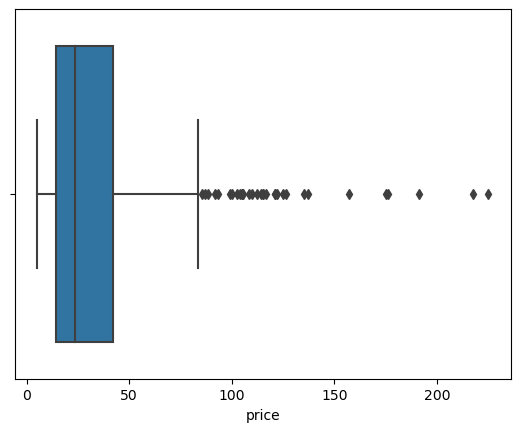

In [394]:
#Box Plot / Boîte à moustaches:
#nous montre les valeurs extrêmes et la symétrie, la dispersion ou la centralité de la distribution des valeurs 
#associées à la variable 'price'
#pas de symétrie dans la distribution
sns.boxplot(erp_liaison_web['price'])
plt.show()

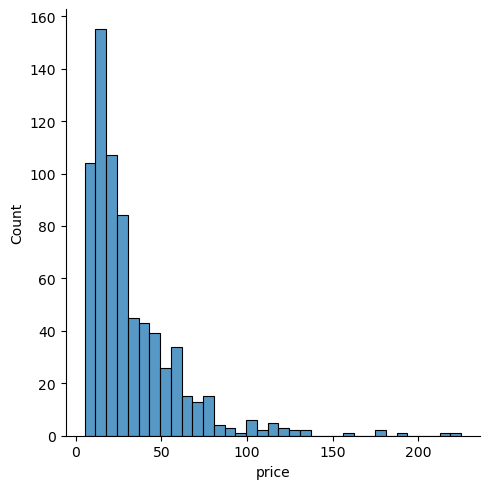

In [395]:
#histogramme pour la variable quantitative 'price'(courbe de densité)
sns.displot(erp_liaison_web['price'])
plt.show()

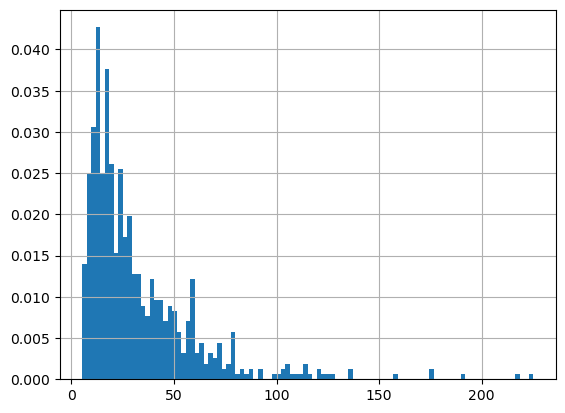

In [396]:
#histogramme pour la variable quantitative continue price qui montre les valeurs extremes à droite 
#l'histogramme est étalé à droite et presente donc une asymétrie 
erp_liaison_web['price'].hist(density=True, bins=100)
plt.show()

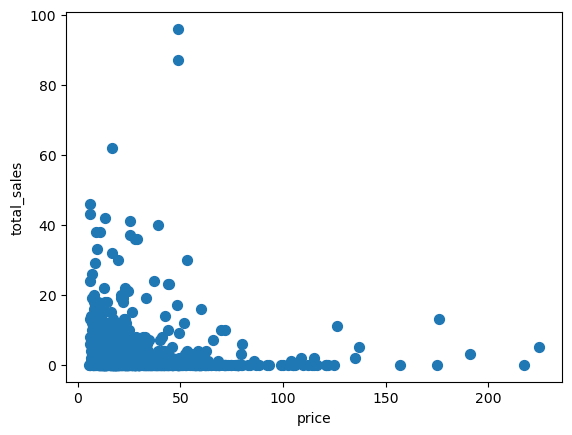

In [397]:
#Diagramme de dispersion / Nuage de points mettant en relief la relation entre les 2 variables price et total_sales
#montre la concentration de la plupart des prix à gauche et les valeurs extremes à droite
#plus les prix sont élevés, moins il y a de ventes des produits
erp_liaison_web.plot.scatter( x="price", y="total_sales", s = 50)
plt.show()

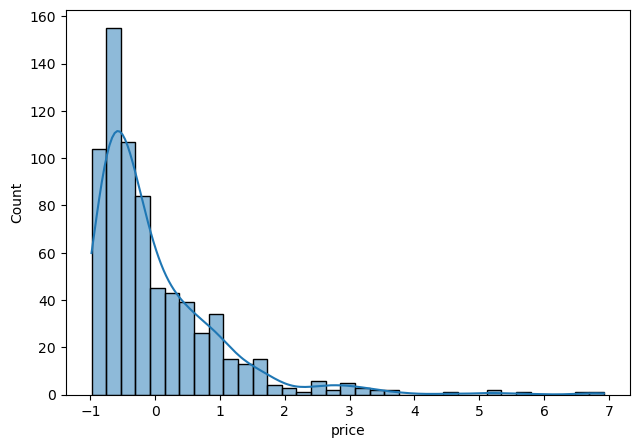

In [398]:
#histogramme pour la variable quantitative 'price'(courbe de densité)
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.histplot((erp_liaison_web['price']-erp_liaison_web['price'].mean())/erp_liaison_web['price'].std(), kde=True)
plt.show()